# Выпускной проект : E-commerce — Выявление профилей потребления

# Описание: 
Для таргетированной рекламы интернет-магазина товаров для дома и быта «Пока все ещё тут» необходимо сегментировать покупателей на основе истории их покупок, произвести исследовательский анализ данных и сформулировать и проверить статистические гипотезы.

# Цели исследования:
    - разработать рекомендации о том, каким клиентам и когда следует рассылать рекламные предложения о каких категориях товаров
    - разработать стратегию по увеличению количества продаваемого товара для каждого сегмента
    - Предложить способы повышения возвращаемости покупателей для различных сегментов

## Изучить общую информацию о полученных данных

In [1]:
import pandas as pd
from datetime import datetime
from datetime import date, timedelta as td
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from scipy import stats

In [2]:
data = pd.read_csv('/datasets/ecom_dataset_upd.csv')
data

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0


Всего в датафрейме 6 колонок и 7474 строки.
Колонки:
    
    - date - дата совершения заказа
    - customer_id - индивидуальнный id покупателя 
    - order_id - индивидуальнный id заказа
    - product - наименование и характеристики товара в заказе
    - quantity - количество заказанного товара 
    - price - цена за товар

## Предобработка данных

In [3]:
def preprocessing(dt):
    display('Получение общей информации о данных в таблице')
    display(dt.info())
    display('Подсчёт пропусков в таблице')
    display(dt.isna().sum())
    display('Статистические показатели таблицы')
    display(dt.describe())
    display('Количество строк и столбцов')
    display(dt.shape)
    display('Явных дубликатов в таблице:', dt.duplicated().sum())
preprocessing(data)

'Получение общей информации о данных в таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


None

'Подсчёт пропусков в таблице'

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

'Статистические показатели таблицы'

,date,order_id,quantity,price
count,7.474000e+03,7474.000000,7474.000000,7474.000000
mean,2.018913e+09,49449.884265,2.362858,478.737501
std,4.278878e+05,32679.642404,14.500497,901.615895
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019022e+09,14833.000000,1.000000,97.000000
50%,2.019051e+09,68768.000000,1.000000,135.000000
75%,2.019063e+09,71257.750000,1.000000,439.000000
max,2.020013e+09,112789.000000,1000.000000,14917.000000


'Количество строк и столбцов'

(7474, 6)

'Явных дубликатов в таблице:'

0

Для начала разберемся с некорректным типом данных в категории даты.

In [4]:
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

Добавим показатель выручки 'revenue' и показатель чека покупки average_bill для дальнейшего исследования.

In [5]:
data['revenue'] = data['quantity'] * data['price']
data['purchase'] = data.groupby('order_id')['revenue'].transform('sum')
data

,date,customer_id,order_id,product,quantity,price,revenue,purchase
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,1037.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,1037.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,1037.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,1037.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,1037.0
...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,76.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,128.0


In [6]:
display(data['purchase'].value_counts())
data['purchase'].value_counts()

114750.0    888
23660.0     203
3630.0       90
134.0        81
74.0         65
           ... 
2800.0        1
5287.0        1
14.5          1
71.0          1
26.0          1
Name: purchase, Length: 968, dtype: int64

114750.0    888
23660.0     203
3630.0       90
134.0        81
74.0         65
           ... 
2800.0        1
5287.0        1
14.5          1
71.0          1
26.0          1
Name: purchase, Length: 968, dtype: int64

Проверим данные наличие заказов совершенных более чем одним покупателем

In [7]:
costum_number = data.groupby('order_id')['customer_id'].nunique().reset_index()
valid_orders = costum_number[costum_number['customer_id'] == 1]['order_id']
data = data[data['order_id'].isin(valid_orders)]
data

,date,customer_id,order_id,product,quantity,price,revenue,purchase
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,1037.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,1037.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,1037.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,1037.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,1037.0
...,...,...,...,...,...,...,...,...
7469,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,76.0
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,869.0
7471,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,354.0
7472,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,128.0


Проверим данные на наличие выбросов по количеству заказов на покупателя

In [8]:
customer_order = data.groupby('customer_id')['order_id'].nunique().reset_index()
customer_order = customer_order.rename(columns={'order_id': 'count_order'})
customer_order.sort_values(by='count_order')

,customer_id,count_order
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1433,99fd7fa2-4e47-4522-84b5-bd45176117c0,1
1432,99e728ef-b118-477d-95a1-3dab449d2db1,1
1431,9990ce3c-995c-4990-8dc5-75583a0c11d2,1
1430,9988a59f-f1ec-4f0c-bb3e-cd0e235ad15e,1
...,...,...
17,0184f535-b60a-4914-a982-231e3f615206,5
1719,b7b865ab-0735-407f-8d0c-31f74d2806cc,7
1080,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17
730,4d93d3f6-8b24-403b-a74b-f5173e40d7db,35


In [9]:
data = pd.merge(data, customer_order, on='customer_id', how='left')
data

,date,customer_id,order_id,product,quantity,price,revenue,purchase,count_order
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,1037.0,1
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,1037.0,1
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,1037.0,1
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,1037.0,1
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,1037.0,1
...,...,...,...,...,...,...,...,...,...
7380,2020-01-30 21:00:00,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт...,2,38.0,76.0,76.0,2
7381,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,869.0,2
7382,2020-01-31 02:00:00,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 ...,1,354.0,354.0,354.0,2
7383,2020-01-31 12:00:00,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цве...,1,128.0,128.0,128.0,2


Проверим индивидуальность номера каждого заказа по дате.

In [10]:
last_order = data.groupby('order_id')['date'].nunique()
last_order.value_counts()

1     3236
2      172
3       47
4       14
5        7
6        4
7        4
9        2
8        1
10       1
16       1
60       1
74       1
23       1
Name: date, dtype: int64

Видим что для некоторых заказов существует несколько дат, что не является нормой, оставим только те данные которые были сделанны в последний раз.

In [11]:
last_orders = data.groupby('order_id').agg({'date': 'last'}).reset_index()
data = pd.merge(last_orders, data, on=['order_id', 'date'], how='left')
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1
...,...,...,...,...,...,...,...,...,...
5481,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2
5482,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2
5483,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2
5484,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2


Проверим данные на аномальные количественными значения в столбцах. 

In [12]:
columns_un = ['purchase', 'count_order']
for col in columns_un:
    print(f"\nСтолбец: {col}")
    value_counts = data[col].value_counts().sort_values(ascending=False)
    print(value_counts)


Столбец: purchase
134.0     81
74.0      65
1087.0    60
1649.0    54
2922.0    51
          ..
688.0      1
1520.0     1
4700.0     1
1010.0     1
2247.0     1
Name: purchase, Length: 958, dtype: int64

Столбец: count_order
1      3167
2      1892
3       153
126     143
35       45
5        29
4        22
7        18
17       17
Name: count_order, dtype: int64


С помощью перцентилей отсекаем аномальные значения в количественных показателях (количества покупок, выручки, и количество покупок на покупателя).

In [13]:
columns_to_process = ['purchase', 'count_order']
for col in columns_to_process:
    upper_bound = data[col].quantile(0.98)
    data = data[(data[col] <= upper_bound)]
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1
...,...,...,...,...,...,...,...,...,...
5481,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2
5482,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2
5483,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2
5484,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2


Вывод: 
   
   В данных после предобработки мы получили:
        
        - Корректные данные в значении даты заказа 
        - убраны аномальные значения в значениях чека покупки, количества закзов на одного покупателя и номеру заказа на который записанно больше одной покупки
        - убрали неявные дубликаты номеров заказа не соответствующих по уникальности даты.

## Исследовательский анализ данных

В данной части проекта будет произведена следующая работа:
    
    - составить категории товаров из первых слов из series "product"
    - построить гистограмму для наглядности каждой категории
    - составить топ 3 для каждой категории товаров по количеству покупок
    - сегментировать покупателей по категории, количеству покупок(как часто и в каком количестве товара) и времени совершения последней покупки
    - определить день недели, месяц и год совершения покупки
    - построить график категорий товаров по годам
    - определить сезонность категории товара
    - найти выручку для каждого сегмента пользователей

### Категоризация

Категоризацию будем производить в ручную по первому слову в наименновании товара в колонке product, для этого сначала вытащим первое слово из product в отдельный столбец.

In [14]:
data['category'] = data['product'].str.split().str[0]
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1,Осина
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1,Осина
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1,Рассада
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1,Рассада
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1,Рассада
...,...,...,...,...,...,...,...,...,...,...
5481,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2,Пеларгония
5482,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2,Петуния
5483,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2,Рассада
5484,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2,Ранункулус


In [15]:
data['category'].nunique()

455

Всего получается 445 значение уникального  показателей товаров.

Проанализировав весь список товаров сделаем 4 категории товаров:

    - товары для ремонта (repair)
    - товары для дома (house)
    - товары для дачи (country_house)
    - товары для кухни (kitchen)

In [16]:
repair = ['Ванна', 'Завертка', 'Измерительный', 'Карниз', 'Кисточка', 'Ковш',
       'Крепеж', 'Лестница', 'Лестница-стремянка', 'Линейка,', 'Мешок',
       'Многофункциональный', 'Насадка-моп', 'Петля', 'Петля-стрела',
       'Плечики', 'Подрукавник', 'Полка', 'Пружина', 'Ручка-скоба',
       'Сверло', 'Сверло-фреза,', 'Стремянка', 'Стремянка-табурет',
       'Стяжка', 'Стяжки', 'Уголок', 'Фал', 'Фиксатор-шар', 'Холодная',
       'Шило', 'Шнур', 'Шпагат', 'Шпингалет', 'Штанга', 'Штангенциркуль',
       'дача', 'Стремянки', 'Полки', 'Веревка']
house = ['Автоматическая', 'Антижир', 'Антинакипин', 'Ароматизированное',
       'Бак', 'Бальзам', 'Бельевые', 'Бензин', 'Бидон', 'Ваза',
       'Вакуумный', 'Вантуз', 'Ведро', 'Веник', 'Вешалка',
       'Вешалка-плечики', 'Вешалки', 'Гипоаллергенный', 'Гладильная',
       'Двуспальное', 'Декоративная', 'Держатель', 'Дозатор', 'Ерш',
       'Жестяная', 'Жидкое', 'Запасная', 'Зубная', 'Искусственная',
       'Искусственный', 'Ключница', 'Ковер', 'Коврик', 'Кольца',
       'Комнатное', 'Комод', 'Комплект', 'Кондиционер', 'Корзина',
       'Корзинка', 'Коробка', 'Корыто', 'Котел', 'Кофр', 'Крючок', 'Лавр',
       'Лантана', 'Махровое', 'Муляж', 'Мускари', 'Мусорный', 'Мыло',
       'Мыло-скраб', 'Мыльница', 'Набор', 'Наволочка', 'Наматрасник',
       'Наматрацник', 'Нолина', 'Наматрицник-чехол', 'Насадка',
       'Насадка-отжим', 'Настенная', 'Настольная', 'Обувница-3', 'Одеяло',
       'Окномойка', 'Ополаскиватель', 'Отбеливатель', 'Отжим', 'Паста',
       'Пена', 'Перчатки', 'Плед', 'Подарочный', 'Подголовник',
       'Подкладка', 'Пододеяльник', 'Подставка', 'Подушка', 'Покрывало',
       'Покрытие', 'Полотенце', 'Прищепки', 'Пробка', 'Простынь',
       'Простыня', 'Пылесос', 'Пьезозажигалка', 'Ролик', 'Рукав',
       'Светильник', 'Сервировочная', 'Сетка', 'Сиденье', 'Сито',
       'Скатерть', 'Складная', 'Складной', 'Скребок', 'Сменная',
       'Сменный', 'Сметка', 'Совок', 'Сотейник', 'Средство', 'Стеллаж',
       'Стиральный', 'Сумка', 'Сумка-тележка', 'Сушилка', 'Таз',
       'Тележка', 'Термометр', 'Ткань', 'Тряпка', 'Тряпкодержатель',
       'Увлажняющая', 'Универсальное', 'Урна', 'Урна-пепельница', 'Утюг',
       'Фен', 'Фоторамка', 'Халат', 'Цветок', 'Цветущее', 'Чехол',
       'Чистящий', 'Швабра', 'Штора', 'Щетка', 'Щетка-сметка', 'Этажерка',
       'Ящик', 'бытовые', 'Ёрш', 'Ковёр', 'Махровый', 'Щётка', 'Кипятильник', 'Ручка']
country_house = ['Агератум', 'Адиантум', 'Азалия', 'Аквилегия', 'Алиссум', 'Алоэ',
       'Альбука', 'Амариллис', 'Анемона', 'Антуриум', 'Аптения', 'Арбуз',
       'Аргирантерум', 'Артемизия', 'Аспарагус', 'Астра', 'Афеляндра',
       'Бадан', 'Базилик', 'Баклажан', 'Бакопа', 'Бальзамин', 'Барвинок',
       'Бархатцы', 'Бегония', 'Буддлея', 'Бузульник', 'Валериана',
       'Вербейник', 'Вербена', 'Виола', 'Газания', 'Гайлардия',
       'Гардения', 'Гвоздика', 'Герань', 'Гербера', 'Гиацинт',
       'Гимнокалициум', 'Гиностемма', 'Гипсофила', 'Глоксиния', 'Годеция',
       'Горох', 'Гортензия', 'Девичий', 'Декабрист', 'Дендробиум',
       'Диффенбахия', 'Драцена', 'Душица', 'Дыня', 'Ель', 'Замиокулькас',
       'Защитный', 'Зверобой', 'Земляника', 'Змееголовник', 'Импатиенс',
       'Иссоп', 'Кабачок', 'Каланхое', 'Калатея', 'Календула',
       'Калибрахоа', 'Калла', 'Каллуна', 'Калоцефалус', 'Камнеломка',
       'Кампанула', 'Капсикум', 'Капуста', 'Кипарисовик', 'Клен',
       'Клубника', 'Кодонанта', 'Колеус', 'Колокольчик', 'Кореопсис',
       'Космея', 'Котовник', 'Крассула', 'Крокусы', 'Лаванда', 'Лаватера',
       'Лапчатка', 'Левкой', 'Лен', 'Лилейник', 'Литопс', 'Лобелия',
       'Львиный', 'Любисток', 'Маттиола', 'Мединилла', 'Мелисса',
       'Мимоза', 'Мирт', 'Многолетнее', 'Молодило', 'Монарда', 'Муррайя',
       'Мята', 'Настурция', 'Незабудка', 'Нефролепис', 'Нивянник',
       'Новогоднее', 'Однолетнее', 'Осина', 'Папоротник', 'Патиссон',
       'Пахира', 'Пеларгония', 'Пеперомия', 'Петрушка', 'Петуния',
       'Платикодон', 'Подвесное', 'Подсолнечник', 'Портулак', 'Примула',
       'Пуансетия', 'Радермахера', 'Ранункулус', 'Рассада', 'Роза',
       'Рудбекия', 'Салат', 'Сальвия', 'Сантолина', 'Седум', 'Сельдерей',
       'Синнингия', 'Скиммия', 'Смолевка', 'Солидаго', 'Соланум',
       'Спатифиллум', 'Суккулент', 'Сциндапсус', 'Табак', 'Тагетис',
       'Тимьян', 'Томат', 'томата', 'Тыква', 'Тюльпан', 'Укроп',
       'Фаленопсис', 'Фатсия', 'Фиалка', 'Физостегия', 'Фикус',
       'Фиттония', 'Флокс', 'Фуксия', 'Хамедорея', 'Хлорофитум', 'Хоста',
       'Хризантема', 'Хризолидокарпус', 'Целозия', 'Цикламен',
       'Цикламен,', 'Цинерания', 'Циния', 'Циперус', 'Цитрофортунелла',
       'Чабер', 'Шалфей', 'Шеффлера', 'Эвкалипт', 'Энотера', 'Эпипремнум',
       'Эхеверия', 'Эхинокактус', 'Юкка', 'Ясколка', 'Цинерария', 'Эшшольция',
        'Пуансеттия', 'Георгина', 'Цинния', 'Эхинацея', 'Пиретрум', 'Вероника', 'Вигна',
        'Джункус']
kitchen = ['Tepмокружка', 'Банка', 'Блюдо', 'Блюдце', 'Бульонница', 'Весы',
       'Вилка', 'Вкладыши', 'Губка', 'Доска', 'Емкость', 'Защитная',
       'Измельчитель', 'Картофелемялка', 'Кастрюля', 'Контейнер',
       'Концентрат', 'Кофе', 'Кружка', 'Крышка', 'Кувшин', 'Кухонное',
       'Кухонные', 'Ложка', 'Лопатка', 'Лоток', 'Лук', 'Мантоварка',
       'Мантоварка-пароварка', 'Масленка', 'Мерный', 'Миксер',
       'Мини-сковорода', 'Миска', 'Модульная', 'Морковь', 'Нетканые',
       'Нож', 'Ножеточка', 'Овощеварка', 'Овощечистка', 'Овсянница',
       'Огурец', 'Орехоколка', 'Основание', 'Отделитель', 'Половник',
       'Пресс', 'Просеиватель', 'Противень', 'Пряные', 'Разделочная',
       'Рассекатель', 'Решетка', 'Розмарин', 'Рыбочистка', 'Салатник',
       'Салфетка', 'Салфетница', 'Сахарница', 'Скалка', 'Сковорода',
       'Соковарка', 'Соковыжималка', 'Стакан', 'Стеклянная', 'Столовая',
       'Столовый', 'Тарелка', 'Терка', 'Термокружка', 'Термос',
       'Термостакан', 'Толкушка', 'Тортница', 'Фарфоровая', 'Форма',
       'Хлебница', 'Чайная', 'Чайник', 'Чайный', 'Шприц', 'Электроштопор', 'Кориандр',
          'Готовая', 'Венчик', 'Универсальный']

Распределим каждый товар по категориям и заведем отдельный столбец для них. Так же сделаем отдельную категорию 'где-то пропустил' для того чтобы не было показаателей которые бы не вошли в категорию.

In [17]:
def sigments(cat):
    for i in repair:
        if i in cat:
            return 'ремонт'
    for i in house:
        if i in cat:
            return 'домашние вещи'
    for i in country_house:
        if i in cat:
            return 'дачные приблуды'
    for i in kitchen:
        if i in cat:
            return 'кухонные приборы'
    return 'где-то пропустил'
data['category_pr'] = data['category'].apply(sigments)
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1,Осина,дачные приблуды
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1,Осина,дачные приблуды
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1,Рассада,дачные приблуды
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1,Рассада,дачные приблуды
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1,Рассада,дачные приблуды
...,...,...,...,...,...,...,...,...,...,...,...
5481,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2,Пеларгония,дачные приблуды
5482,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2,Петуния,дачные приблуды
5483,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2,Рассада,дачные приблуды
5484,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2,Ранункулус,дачные приблуды


Провееряем есть ли пропущенные категории в данных, если нет то на всякий случай удаляем лишнию категорию.

In [18]:
data3 = data[data['category_pr'] == 'где-то пропустил']
data3['category'].unique()

array([], dtype=object)

In [19]:
data = data[data['category_pr'] != 'где-то пропустил']

### Гистограмма категорий

Для наглядности получившихся результатов разбиения товаров по категориям и для дальнейшего исследования сделаем гистограммы категорий по выручке и по количеству заказанных товаров товаров.

Строим график категорий по выручке 

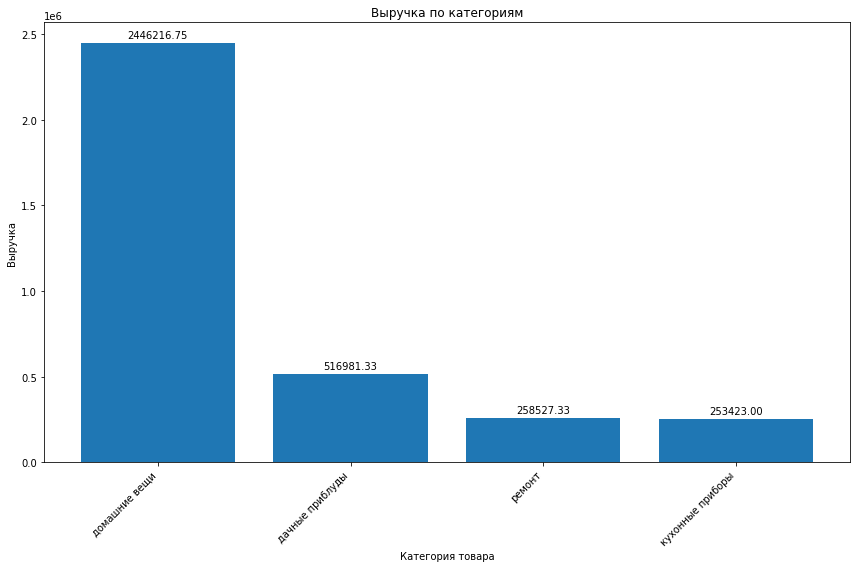

In [65]:
data_4_gist = data.groupby(by='category_pr')['revenue'].sum().reset_index()
data_4_gist = data_4_gist[['revenue', 'category_pr']]
data_4_gist = data_4_gist.sort_values(by='revenue', ascending=False)
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(data_4_gist['category_pr'], data_4_gist['revenue'])
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom')
ax.set_title('Выручка по категориям')
ax.set_xlabel('Категория товара')
ax.set_ylabel('Выручка')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Из графика видим, что категория "домашние вещи" сильно лидирует по выручке по сравнению с остальными, построим ТОП-10 по данной категории для пониманию что все таки является самым прибыльным для магазина в этой категории и нет ли каких-то аномальных значений.

In [21]:
data[data['category_pr'] == 'домашние вещи'].sort_values(by='revenue', ascending= False).head(10)

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr
2233,68727,2018-10-23 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,"Веник сорго с деревянной ручкой с 4-мя швами, ...",17,530.0,9010.0,9010.0,35,Веник,домашние вещи
3987,71685,2019-06-12 09:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,Скатерть 180 см WELLNESS WTd180-Лион*01 100% п...,8,1104.0,8832.0,8832.0,2,Скатерть,домашние вещи
3676,71035,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0,8737.0,8737.0,1,Сумка-тележка,домашние вещи
2324,68815,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,Муляж ЯБЛОКО 9 см красное,170,51.0,8670.0,8670.0,1,Муляж,домашние вещи
3358,70423,2019-02-24 10:00:00,ac250053-a236-467a-97d2-ddbb9bf4a1ba,Сумка-тележка хозяйственная Andersen Alu Star ...,1,8437.0,8437.0,8437.0,2,Сумка-тележка,домашние вещи
2343,68831,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,Муляж ЯБЛОКО 9 см красное,140,59.0,8260.0,8260.0,1,Муляж,домашние вещи
5272,109758,2020-01-26 19:00:00,04416514-5346-4f90-93e3-fb7365e2ee8c,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0,8077.0,8077.0,2,Сумка-тележка,домашние вещи
3775,71227,2019-04-21 16:00:00,19d904d8-8d16-476d-8f66-b2a3b7a23660,Сумка-тележка хозяйственная Rolser MNB019 rojo...,1,8077.0,8077.0,8077.0,2,Сумка-тележка,домашние вещи
4115,71957,2019-07-12 13:00:00,3fb078a8-eccf-4780-b130-3bde6b8c6b10,Чехол для гладильной доски Attribute METAL 140...,10,787.0,7870.0,7870.0,1,Чехол,домашние вещи
2417,68908,2018-11-07 19:00:00,6ae61023-9d87-4ff3-a02e-b42eab150140,Коврик придверный Attribute NATURE кокосовый 6...,27,286.0,7722.0,7722.0,1,Коврик,домашние вещи


И так же построим гисторамму по количеству товаров в заказе.

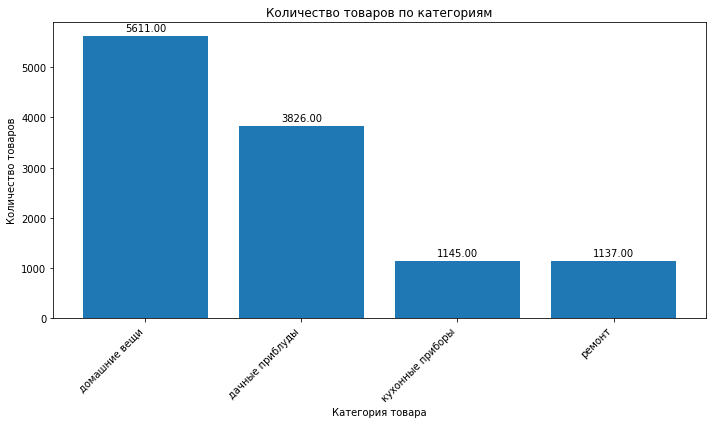

In [22]:
data_4_gist_с = data.groupby(by ='category_pr')['quantity'].sum().reset_index()
data_4_gist_с = data_4_gist_с[['quantity', 'category_pr']]
data_4_gist_с = data_4_gist_с.sort_values(by='quantity', ascending=False)
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(data_4_gist_с['category_pr'], data_4_gist_с['quantity'])
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
            xy=(bar.get_x() + bar.get_width() / 2, height),
            xytext=(0, 3),
            textcoords="offset points",
            ha='center', va='bottom')
ax.set_title('Количество товаров по категориям')
ax.set_xlabel('Категория товара')
ax.set_ylabel('Количество товаров')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Видим, что большинство заказов по количеству товара за домашними веещами и дачными приблудами (не большая разница впринципе).
Из графиков можно сделать предположение, что товары категории "домащние вещи" гораздо дороже чем, товары категория "дачные приблуды". Для их подтверждения выведем топы: 
    
    - топ 3 для каждой категории товаров по выручке
    - топ 3 для каждой категории товаров по количеству товаров в каждом заказе

In [23]:
data_top_3 = data.sort_values(['category_pr', 'quantity'], ascending=[True, False]).groupby('category_pr').head(3)
data_top_3

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr
3548,70776,2019-03-18 10:00:00,21b4642e-9cdf-4738-a290-b42d3e748c0f,Гвоздика стандартная Белая 60 см Колумбия План...,43,29.0,1247.0,1247.0,1,Гвоздика,дачные приблуды
3299,70327,2019-02-18 15:00:00,61f60726-5362-44d0-a0ae-800730389f32,Эхинокактус Грузони d-5 см,29,74.0,2146.0,2146.0,1,Эхинокактус,дачные приблуды
773,14696,2019-04-26 12:00:00,9fbf7c33-e563-4475-a9dc-0eb06fe1a3a4,Однолетнее растение Петуния махровая в кассете...,25,82.0,2050.0,2050.0,1,Однолетнее,дачные приблуды
2324,68815,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,Муляж ЯБЛОКО 9 см красное,170,51.0,8670.0,8670.0,1,Муляж,домашние вещи
2343,68831,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,Муляж ЯБЛОКО 9 см красное,140,59.0,8260.0,8260.0,1,Муляж,домашние вещи
2746,69206,2018-12-04 17:00:00,7d255526-fcc2-4f79-b28a-217d7d2373a8,"Щетка для посуды *ОЛЯ*, Мультипласт 1807010",100,26.0,2600.0,2600.0,1,Щетка,домашние вещи
4502,72698,2019-09-19 16:00:00,de95510f-3558-4c42-97dc-98cc4215c278,Универсальный нож WEBBER из нержавеющей стали ...,80,45.0,3600.0,3600.0,1,Универсальный,кухонные приборы
4559,72811,2019-09-30 16:00:00,0af078d6-facf-4ece-ad7b-3b4446ec19a2,Кружка с трубочкой Attribute МЯЧ 500 мл JAR501,60,76.0,4560.0,4560.0,1,Кружка,кухонные приборы
2736,69194,2018-12-04 05:00:00,b0f1833c-0763-4f4e-b097-41d27a521e46,Кружка НОРДИК 380мл прозрачная H8502 Luminarc ...,30,58.0,1740.0,2827.0,1,Кружка,кухонные приборы
2790,69289,2018-12-10 14:00:00,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0,5800.0,5800.0,1,Ручка-скоба,ремонт


In [24]:
data_top_3 = data.sort_values(['category_pr', 'revenue'], ascending=[True, False]).groupby('category_pr').head(3)
data_top_3

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr
3898,71514,2019-05-26 09:00:00,8a832dff-d6f8-4053-8f7b-91dd69e27a3c,Роза одноголовая Тоффи 70 см Эквадор плантация...,25,157.0,3925.0,3925.0,1,Роза,дачные приблуды
4491,72681,2019-09-18 10:00:00,05257dd3-0c7e-4b4c-a86d-786558162d11,Гортензия Микс в кашпо с автополивом,1,3599.0,3599.0,3599.0,1,Гортензия,дачные приблуды
3426,70543,2019-03-01 20:00:00,69cf691b-a6c2-4543-aa8a-8cf42fe4a76e,Эпипремнум Ауреум d-12 см,15,235.0,3525.0,3525.0,1,Эпипремнум,дачные приблуды
2233,68727,2018-10-23 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,"Веник сорго с деревянной ручкой с 4-мя швами, ...",17,530.0,9010.0,9010.0,35,Веник,домашние вещи
3987,71685,2019-06-12 09:00:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,Скатерть 180 см WELLNESS WTd180-Лион*01 100% п...,8,1104.0,8832.0,8832.0,2,Скатерть,домашние вещи
3676,71035,2019-04-05 19:00:00,c0c60544-3a99-49d0-8a8e-cf7f293c22cb,Сумка-тележка хозяйственная Andersen Royal Sho...,1,8737.0,8737.0,8737.0,1,Сумка-тележка,домашние вещи
3130,70009,2019-01-28 22:00:00,0a29b892-f32e-483a-871c-d05bb91bbb95,"Модульная стеклянная банка 1,1л, 298264, Braba...",7,825.0,5775.0,5775.0,1,Модульная,кухонные приборы
4559,72811,2019-09-30 16:00:00,0af078d6-facf-4ece-ad7b-3b4446ec19a2,Кружка с трубочкой Attribute МЯЧ 500 мл JAR501,60,76.0,4560.0,4560.0,1,Кружка,кухонные приборы
4502,72698,2019-09-19 16:00:00,de95510f-3558-4c42-97dc-98cc4215c278,Универсальный нож WEBBER из нержавеющей стали ...,80,45.0,3600.0,3600.0,1,Универсальный,кухонные приборы
4665,72992,2019-10-16 15:00:00,d5584388-ffbe-42fd-a746-a98828ec919f,Стремянка 7 ступенчатая Hailo 8040-707 XXL 13 ...,1,7724.0,7724.0,7724.0,1,Стремянка,ремонт


### Определяем сезонность категории товара

Для определения сезонности товара для каждой категории товара нам необходимо определеть дополнительные значения исходящие из даты совершения заказа: 
    
    - год совершения заказа
    - месяц совершения заказа
    - день недели совершения заказа

In [25]:
data['date_y'] = data['date'].dt.year
data['date_d'] = data['date'].dt.dayofweek
data['date_y_m'] = data['date'].dt.to_period('M')
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr,date_y,date_d,date_y_m
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5481,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2,Пеларгония,дачные приблуды,2019,2,2019-12
5482,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2,Петуния,дачные приблуды,2019,1,2019-11
5483,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2,Рассада,дачные приблуды,2019,0,2019-12
5484,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2,Ранункулус,дачные приблуды,2020,5,2020-01


Сделаем графики отображающие весь период времени, по колличеству заказов, динамику выручки, среднего чека и его динамики и помесячная динамику средней выручки с покупателя.

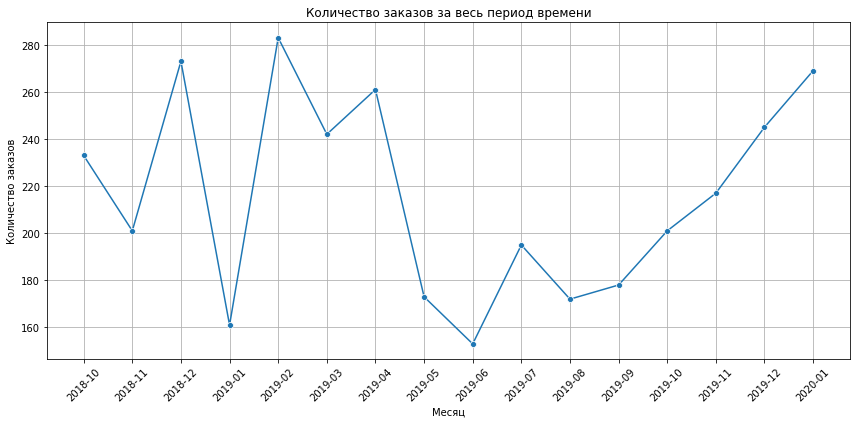

In [26]:
data_by_month = data.groupby('date_y_m')['order_id'].nunique().reset_index()
data_by_month['date_y_m'] = data_by_month['date_y_m'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_y_m', y='order_id', data=data_by_month, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Количество заказов')
plt.title('Количество заказов за весь период времени')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Динамика выручки

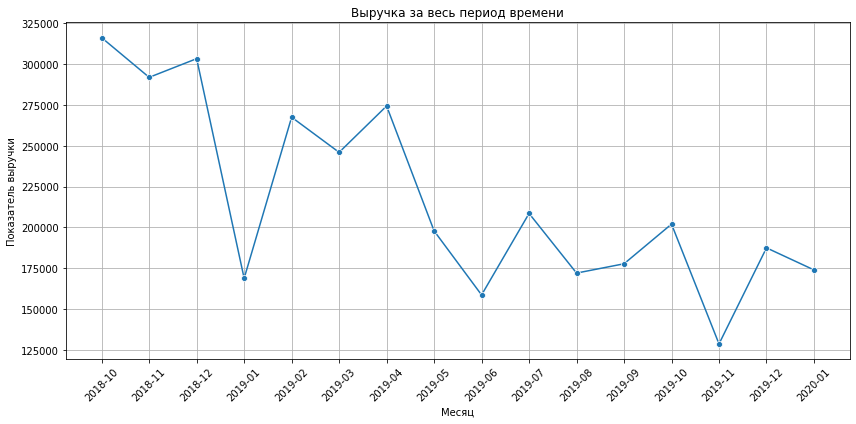

In [27]:
data_by_revenue = data.groupby('date_y_m')['revenue'].sum().reset_index()
data_by_revenue['date_y_m'] = data_by_revenue['date_y_m'].astype(str)
data_by_revenue
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_y_m', y='revenue', data=data_by_revenue, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Показатель выручки')
plt.title('Выручка за весь период времени')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Средний чек и его динамика

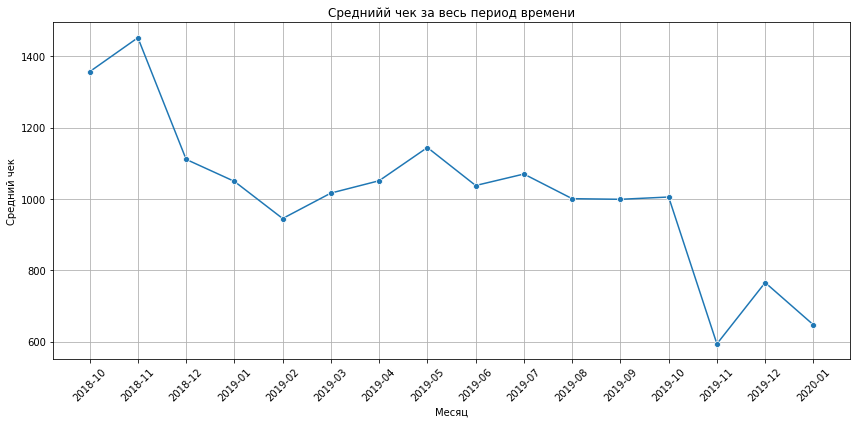

In [28]:
monthly_data = data.groupby('date_y_m').agg({'order_id': 'nunique', 'revenue': 'sum'})
monthly_data['average bill'] = monthly_data['revenue'] / monthly_data['order_id']
monthly_data = monthly_data.reset_index()
monthly_data['date_y_m'] = monthly_data['date_y_m'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_y_m', y='average bill', data=monthly_data, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.title('Среднийй чек за весь период времени')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Помесячная динамику средней выручки с покупателя

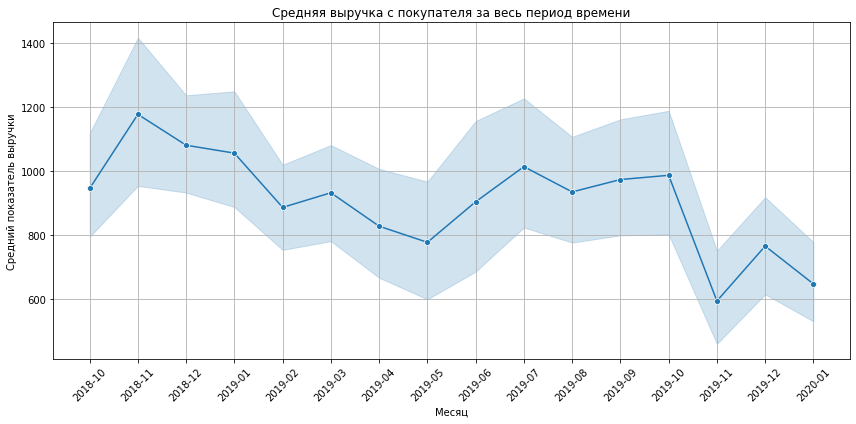

In [29]:
data_by_revenue_m = data.groupby(['date_y_m', 'customer_id'])['revenue'].mean().reset_index()
data_by_revenue_m['date_y_m'] = data_by_revenue_m['date_y_m'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_y_m', y='revenue', data=data_by_revenue_m, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Средний показатель выручки')
plt.title('Средняя выручка с покупателя за весь период времени')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

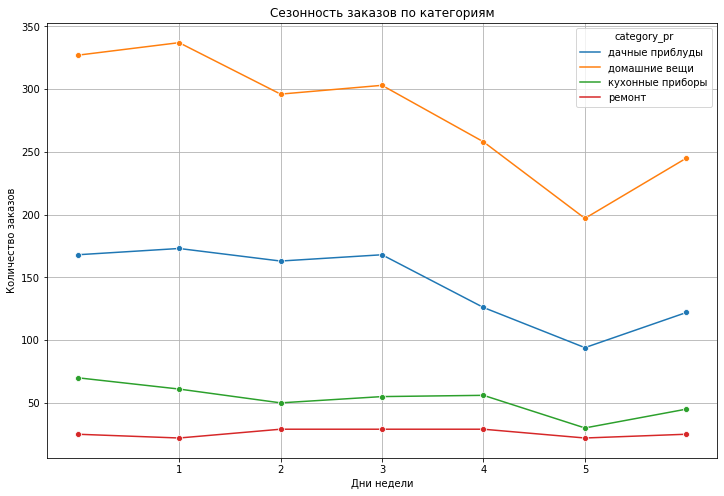

In [30]:
orders_by_day_category = data.groupby(['date_d', 'category_pr'])['order_id'].nunique().reset_index(name='order_count')
plt.figure(figsize=(12, 8))
sns.lineplot(x='date_d', y='order_count', hue='category_pr', data=orders_by_day_category, marker='o')
plt.title('Сезонность заказов по категориям')
plt.xlabel('Дни недели')
plt.ylabel('Количество заказов')
plt.xticks(range(1,6))
plt.grid(True)
plt.show()

Исходя из графиков делаем выводы: 

        - график по колличеству заказов показывает что больше всего заказов было сделано в феврале 2019-го и минимальное значение в июне 2019-го, при этом видно что есть резкие скочки например в июле 2019(на фоне низких продаж) и декабре 2019-го, между ноябрем и декабрем 2018 есть резкий рост как и в 2019, можно предположить, что резкий спад будет так же в январе, если бы было больше данных.
        - в целом выручка магазина идет на спад , при чем в разы и это не связанно с сезонностью так как, показатели за октябрь 2018 года гораздо выше чем за тот же месяц 2019-го , так же можно заметитьбольше всего выручка просидала на фоне пониженного спроса в январе и июне 2019-го.
        - показатели среднего чека в целом такие же как и выручки идут на спад, хотя и в мае 2019 есть небольшой скачок, но это не играет большой роли и из-за размера скочка и из-за того, что это обусловленно сезонностью.
       - из графика помесячной динамики средней выручки с покупателя видно , что в мае как раз где увеличился средний чек впрошлом графике покупатели покупали дешевый товар который делал минимальную среднюю выручку на человека, и впринципе можно сказать, что динамика среднейвыручки на человека так же снизилась в разы (сравнивая декабрь 2018 и декабрь 2019)
       - среди дней недели самыми активными в продажах является начало недели (в понедельник(0) самые большие показатели у всех категорий, это связанно с тем , что дачники заказывают товары на выходные и присматривают заранее , с учетом времени на доставку, товары для дома ремонта и кухни связаны с тем что люди будучи у себя дома понимают чего им недостает и начинаютт заказывать в этот же день или на следующий (что видно в небольшом сплеске в категории товары для дома во вторник (1))

### Сегментирование покупателей

Сегментировать покупателей по категории, количеству покупок(как часто и в каком количестве товара) и времени совершения последней покупки. 
Для решения этой задачи применим методы решения RFM - анализа. RFM – это один из методов анализа, с помощью которого можно делить клиентов на группы в зависимости от времени последнего визита, частоты и суммы покупок.

-R (от англ. recency – давность) – определяет, как давно была совершена сделка. Показывает, сколько прошло времени с последней покупки. 

-F (от англ. frequency – частота) – показывает, насколько часто клиент покупает товар или пользуется определенной услугой. 

-M (от англ. monetary – деньги) – общая вложенность средств в продукт или услугу. Также это можно понимать как общую активность на сайте либо длительность посещения. 

Полученные данные позволяют выявить ключевых покупателей и разработать принципы работы с каждой группой клиентов.

Показатели Recency:

1 – клиенты, которые совершали покупки очень давно ;

2 – относительно недавние клиенты;

3 – только пришедшие клиенты.

In [31]:
data['date'].value_counts()

2019-04-27 16:00:00    51
2019-04-24 21:00:00    44
2019-05-13 15:00:00    36
2019-05-02 16:00:00    36
2019-05-14 11:00:00    32
                       ..
2019-12-08 11:00:00     1
2019-03-22 20:00:00     1
2019-03-17 20:00:00     1
2018-12-17 13:00:00     1
2018-11-18 15:00:00     1
Name: date, Length: 2675, dtype: int64

Сформируем отдельные значения для того чтобы посчитать прошедшие количество дней от сегодняшнего и вспомощью describe() постмотрим обзор значения в категории recency.

In [32]:
data_r = data.groupby('customer_id').agg({'date': 'max'}).reset_index()
today = data['date'].max()
data_r['recency'] = (today - data_r['date']).dt.days
data_r = data_r.sort_values(by='recency', ascending=False)
display(data_r["recency"].value_counts().sort_values(ascending=True).head(50))
data_r.describe()

149    1
209    1
99     1
435    1
243    1
392    1
229    1
223    1
287    1
217    1
482    1
459    1
376    1
273    1
286    1
238    1
396    1
96     1
230    1
139    1
222    1
175    1
295    1
188    1
348    1
120    1
310    1
126    1
128    1
206    1
132    1
138    1
315    1
307    1
395    1
393    1
389    1
146    1
159    1
383    1
325    1
358    1
183    1
418    1
6      2
388    2
475    2
394    2
439    2
1      2
Name: recency, dtype: int64

,recency
count,2386.000000
mean,213.777033
std,149.076013
min,0.000000
25%,71.000000
50%,205.000000
75%,341.750000
max,487.000000


Можно предложить вывести рамки показателей по персентелям, для наглядности построим гистограмму, чтобы понять на сколько корректно делать именно такие рамки.

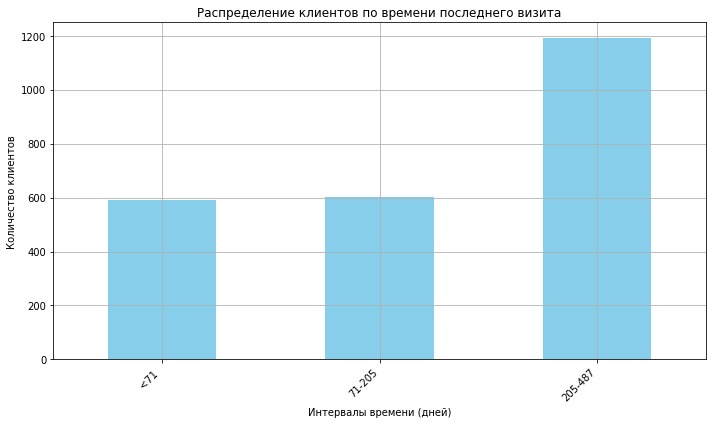

In [33]:
percentiles = [25, 50]
bins = np.percentile(data_r['recency'], percentiles)
bins = np.insert(bins, 0, 0) # ставим нижнюю графницу нулем
bins = np.append(bins, data_r['recency'].max()) # ставим верхнее значение максимальным значением

labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
labels[0] = f'<{int(bins[1])} '

data_r['recency_bins'] = pd.cut(data_r['recency'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
data_r['recency_bins'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Интервалы времени (дней)')
plt.ylabel('Количество клиентов')
plt.title('Распределение клиентов по времени последнего визита')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.grid(True)
plt.show()

In [34]:
data_r['recency'] = pd.cut(data_r['recency'], bins=bins, labels=[3, 2, 1], right=False)
data = pd.merge(data, data_r[['customer_id', 'recency']], on='customer_id', how='left')
data = pd.DataFrame(data)
data['recency'].value_counts()

1    3279
3    1167
2     929
Name: recency, dtype: int64

Показатели Frequency:

1 – клиент совершает очень мало покупок, обычно не превосходит единоразового визита;

2 – клиент приходит за покупками, но крайне редко;

3 – постоянный покупатель, который часто взаимодействует с продуктом.

Попробуем сделать тоже самое что и с показателем recency

In [35]:
data_f = data.groupby('customer_id')['order_id'].nunique().reset_index().sort_values(by='order_id', ascending=False)
data_f
data_f.describe()

,order_id
count,2386.000000
mean,1.448868
std,2.693128
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,125.000000


В методе describe видим, что у максимального показателя слишком большая разница с персентелями по количеству заказов на человека. Попробуем вывести все значения количества заказов на человека и количество таких покупателей.

In [36]:
data_f['order_id'].value_counts()

1      1518
2       841
3        20
4         2
5         1
7         1
17        1
35        1
125       1
Name: order_id, dtype: int64

Из данных, можно сделать вывод , что клиентов делающих больше 3 заказов не так уж и много, основная часть делает это разово или дважду.
Всего у нас датасет дан за 16 месяцев, из него примерно можно прикинуть, что клиент первой категории  совершает очень мало покупок, обычно не превосходит единоразового визита, это значение равное 1  (сделали покупку один раз за 16 месяцев), второму сигменту мы можем из общих значений присвоить что это значения от 1 до 3 ключительно (приходит крайне редко, но все равно приходит, значит какой-то товар его заинтересовал и есть больше шансов привлечь его внимание к товару) и от 4 и выше можно  сказать, что клиент постоянный так как он приходит раз вквартал, за каким-то продуктом который ему нравится.

In [37]:
data_f['frequency'] = pd.cut(data_f['order_id'], bins=[-float('inf') ,1.1, 3, float('inf')], labels=[1, 2, 3], right=False)

data = pd.merge(data, data_f[['customer_id', 'frequency']], on='customer_id', how='left')
data = pd.DataFrame(data)

data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr,date_y,date_d,date_y_m,recency,frequency
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2,Пеларгония,дачные приблуды,2019,2,2019-12,3,2
5381,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2,Петуния,дачные приблуды,2019,1,2019-11,2,2
5382,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2,Рассада,дачные приблуды,2019,0,2019-12,3,2
5383,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2,Ранункулус,дачные приблуды,2020,5,2020-01,3,2


In [38]:
data['frequency'].value_counts()

1    3079
2    1884
3     422
Name: frequency, dtype: int64

Показатели Monetary:

1 – небольшая сумма покупки;

2 – средние затраты;

3 – крупная сумма, которую потратил клиент на товар или услугу компании.

Применим те же методы как и в предыдущих случаях

In [39]:
data_m = data.pivot_table(index='customer_id', values='revenue', aggfunc='sum').reset_index().sort_values(by='revenue', ascending=False)
data_m

,customer_id,revenue
1863,c971fb21-d54c-4134-938f-16b62ee86d3b,152028.0
723,4d93d3f6-8b24-403b-a74b-f5173e40d7db,57278.0
1066,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21361.0
1576,ad66d870-22f5-43bc-958f-73420822586b,13731.0
909,639c4989-b0ab-412a-b7ec-be394cb2d372,12095.0
...,...,...
162,10f79846-2640-4c43-8392-4e76ff5455ef,22.0
1983,d5660bff-407f-463d-b2ff-e90a9ca05976,22.0
2162,e9e94e71-4cd2-47fc-9b3f-1ec96bd2d95e,22.0
321,2330d859-e9cb-4c8f-abd0-55f9e27e6745,15.0


In [40]:
data_m.describe()

,revenue
count,2386.000000
mean,1456.474609
std,3660.517488
min,15.000000
25%,389.000000
50%,824.000000
75%,1762.000000
max,152028.000000


По функции describe видим, что по персентелям можно как раз вывести значения не считая максимальных показателей, но выводя отсортированные значения, видим , что на крупную покупку покупку осмелились только 4 уникальных покупателя, у них покупки больше 10 тысяч, как раз эту группу покупателей выберем 3 сегментом.

In [41]:
data_m['monetary'] = pd.cut(data_m['revenue'], bins=[15, 824, 1762, float('inf')], labels=[1, 2, 3], right=False, include_lowest=True)
data = pd.merge(data, data_m[['customer_id', 'monetary']], on='customer_id', how='left')
data = pd.DataFrame(data)
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr,date_y,date_d,date_y_m,recency,frequency,monetary
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1,1
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1,1
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2,Пеларгония,дачные приблуды,2019,2,2019-12,3,2,1
5381,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2,Петуния,дачные приблуды,2019,1,2019-11,2,2,1
5382,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2,Рассада,дачные приблуды,2019,0,2019-12,3,2,3
5383,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2,Ранункулус,дачные приблуды,2020,5,2020-01,3,2,1


In [42]:
data['recency'].value_counts()

1    3279
3    1167
2     929
Name: recency, dtype: int64

Далее собираем тройки групп по сегментам.

In [43]:
data['rfm'] = data['recency'].astype(str) + data['frequency'].astype(str) + data['monetary'].astype(str)
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr,date_y,date_d,date_y_m,recency,frequency,monetary,rfm
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1,1,111
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1,1,111
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1,111
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1,111
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1,111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2,Пеларгония,дачные приблуды,2019,2,2019-12,3,2,1,321
5381,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2,Петуния,дачные приблуды,2019,1,2019-11,2,2,1,221
5382,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2,Рассада,дачные приблуды,2019,0,2019-12,3,2,3,323
5383,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2,Ранункулус,дачные приблуды,2020,5,2020-01,3,2,1,321


In [44]:
data['rfm'].value_counts()

111    908
113    830
112    803
321    446
323    390
133    328
322    316
211    296
123    214
221    139
212    138
223    124
121     99
222     98
213     79
122     58
233     39
132     26
131     13
232     10
311     10
231      6
313      4
312      1
Name: rfm, dtype: int64

Получившиеся тройки мы сложим в еще 3 группировки , по типу Recency мы поймем к какому типу относятся пользователи (ушедшие - 1, неактивные - 2, постоянные - 3).

In [45]:
data['rfm'] = data['rfm'].astype(str)

In [46]:
departed_clients = ['111', '112', '113', '121', '122', '123', '131', '132', '133']
inactive_clients = ['211', '212', '213', '221', '222', '223','231', '232', '233']
regular_customers = ['311', '312', '313', '321', '322', '323','331', '332', '333']

In [47]:
def sigments_peopl(cd):
    for i in departed_clients:
        if i in cd:
            return '1'
    for i in inactive_clients:
        if i in cd:
            return '2'
    for i in regular_customers:
        if i in cd:
            return '3'
data['sigments'] = data['rfm'].apply(sigments_peopl)
data

,order_id,date,customer_id,product,quantity,price,revenue,purchase,count_order,category,category_pr,date_y,date_d,date_y_m,recency,frequency,monetary,rfm,sigments
0,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 25-50 см",1,150.0,150.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1,1,111,1
1,12624,2019-06-02 20:00:00,d17861fa-db5f-4de4-93fd-dc5e60d24d3e,"Осина обыкновенная, Высота 50-100 см",1,225.0,225.0,375.0,1,Осина,дачные приблуды,2019,6,2019-06,1,1,1,111,1
2,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Лаванды в кассете по ...,1,315.0,315.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1,111,1
3,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Розмарина в кассете п...,1,207.0,207.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1,111,1
4,13547,2018-11-16 16:00:00,b80e4826-7218-4bf9-ac08-eb2c81ab3f62,Рассада зелени для кухни Тимьяна в кассете по ...,1,162.0,162.0,4788.0,1,Рассада,дачные приблуды,2018,4,2018-11,1,1,1,111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,112722,2019-12-11 23:00:00,a479e857-7300-43d4-833c-55dc5bb65c83,Пеларгония плющелистная розовая в подвесном ка...,1,450.0,450.0,450.0,2,Пеларгония,дачные приблуды,2019,2,2019-12,3,2,1,321,3
5381,112732,2019-11-19 19:00:00,db5c1840-bdb7-4f2f-8239-2ab779fd9706,"Петуния Surprise Marine синяя объем 0,5 л",1,90.0,90.0,90.0,2,Петуния,дачные приблуды,2019,1,2019-11,2,2,1,221,2
5382,112767,2019-12-23 12:00:00,493d53bf-ff1f-4487-a6e7-b1bedddb73fd,Рассада томата (помидор) Эфемер № 121 сорт дет...,1,38.0,38.0,38.0,2,Рассада,дачные приблуды,2019,0,2019-12,3,2,3,323,3
5383,112779,2020-01-11 14:00:00,66c57efd-4dd1-49c9-b921-987ab6e161fa,Ранункулус Клуни Ханои 45 см Нидерланды 10 шту...,1,172.0,172.0,172.0,2,Ранункулус,дачные приблуды,2020,5,2020-01,3,2,1,321,3


In [48]:
data['sigments'].value_counts()

1    3279
3    1167
2     929
Name: sigments, dtype: int64

Из получившихся значений у нас получилось 3 сегмента покупателей, опишим каждый из них:

    1 - ушедшие покупатели их подовляющее большинство по сравнению с остальными сегментами

    2 - неактивные покупатели, их не на много меньше чем постоянных, это сезонные покупатели
    
    3 - постоянные, крайне мало для такой категории сегмента по сравнению с ушедшими
    

## Основные вопросы исследования

  - какова динамика выручки магазина?
Построим график для того, чтобы наглядно это показать

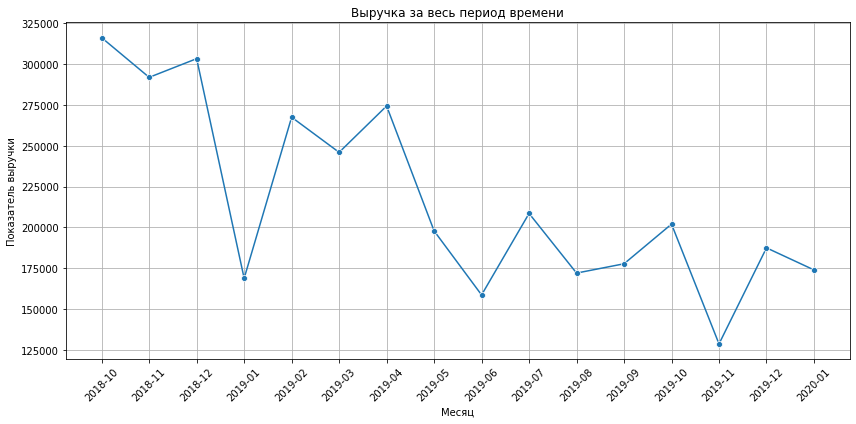

In [49]:
data_by_revenue = data.groupby('date_y_m')['revenue'].sum().reset_index()
data_by_revenue['date_y_m'] = data_by_revenue['date_y_m'].astype(str)
data_by_revenue
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_y_m', y='revenue', data=data_by_revenue, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Показатель выручки')
plt.title('Выручка за весь период времени')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Динамика выручки за все время, стремится вниз, хотя и под конец периода видим что есть небольшой подъем, он все равно мал по сравнению с прошлым годом и связан с сезонностью(новогодними праздниками)

   - какой средний чек и его динамика

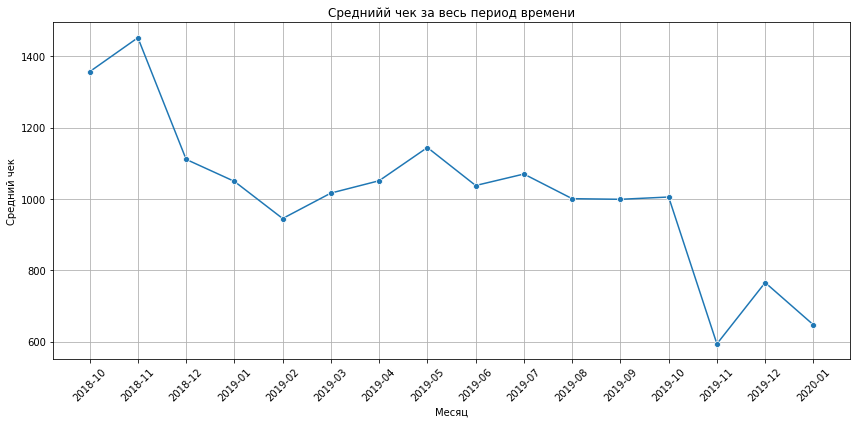

In [50]:
monthly_data = data.groupby('date_y_m').agg({'order_id': 'nunique', 'revenue': 'sum'})
monthly_data['average bill'] = monthly_data['revenue'] / monthly_data['order_id']
monthly_data = monthly_data.reset_index()
monthly_data['date_y_m'] = monthly_data['date_y_m'].astype(str)
plt.figure(figsize=(12, 6))
sns.lineplot(x='date_y_m', y='average bill', data=monthly_data, marker='o')
plt.xlabel('Месяц')
plt.ylabel('Средний чек')
plt.title('Среднийй чек за весь период времени')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Динамика среднего чека так катиться внизу, хотя и имеет скочек в мае, связанный с дачным сезоном.

Самый большой показатель среднего чека в категории "домашние вещи" и ремонт из-за большого колличества товара за один заказ.

- какова помесячную динамику средней выручки с покупателя?

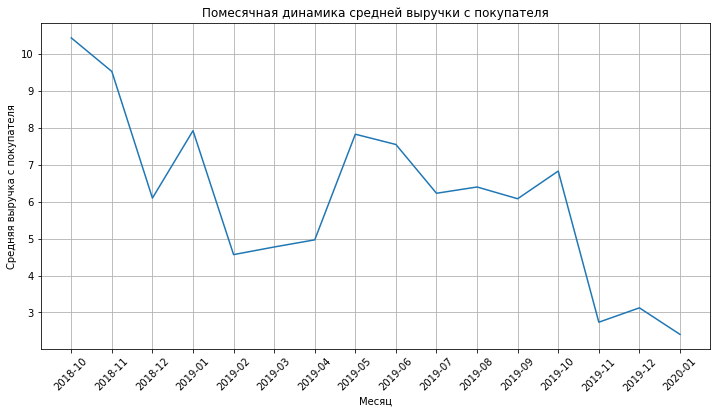

In [51]:
monthly_revenue = data.groupby(['date_y_m', 'customer_id'])['revenue'].sum().reset_index()
unique_customers_per_month = data.groupby('date_y_m')['customer_id'].nunique().reset_index()
unique_customers_per_month = unique_customers_per_month.rename(columns={'customer_id': 'unique_customers'})
merged_data = pd.merge(monthly_revenue, unique_customers_per_month, on='date_y_m', how='left')
merged_data['mean_revenue'] = merged_data['revenue'] / merged_data['unique_customers']
monthly_avg_revenue = merged_data.groupby('date_y_m')['mean_revenue'].mean().reset_index()
monthly_avg_revenue['date_y_m'] = monthly_avg_revenue['date_y_m'].astype(str)
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_revenue['date_y_m'], monthly_avg_revenue['mean_revenue'])
plt.xlabel('Месяц')
plt.ylabel('Средняя выручка с покупателя')
plt.title('Помесячная динамика средней выручки с покупателя')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

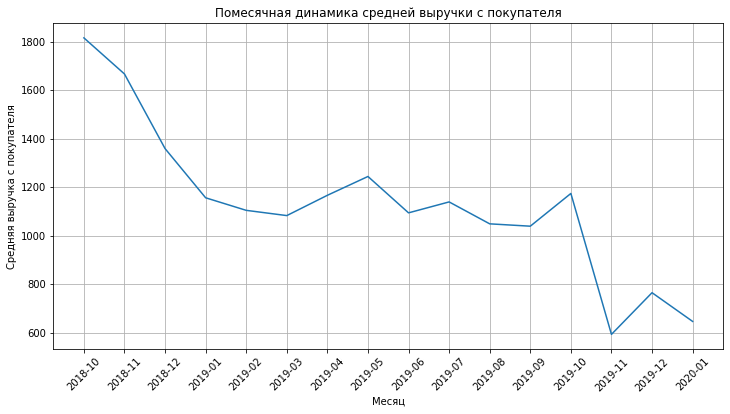

In [52]:
monthly_revenue = data.groupby('date_y_m')['revenue'].sum().reset_index()
unique_customers_per_month = data.groupby('date_y_m')['customer_id'].nunique().reset_index()
unique_customers_per_month = unique_customers_per_month.rename(columns={'customer_id': 'unique_customers'})
merged_data = pd.merge(monthly_revenue, unique_customers_per_month, on='date_y_m', how='left')
merged_data['mean_revenue'] = merged_data['revenue'] / merged_data['unique_customers']
merged_data['date_y_m'] = merged_data['date_y_m'].astype(str)
plt.figure(figsize=(12, 6))
plt.plot(merged_data['date_y_m'], merged_data['mean_revenue'])
plt.xlabel('Месяц')
plt.ylabel('Средняя выручка с покупателя')
plt.title('Помесячная динамика средней выручки с покупателя')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [53]:
merged_data

,date_y_m,revenue,unique_customers,mean_revenue
0,2018-10,316046.000000,174,1816.356322
1,2018-11,291807.000000,175,1667.468571
2,2018-12,303231.000000,223,1359.780269
3,2019-01,168901.000000,146,1156.856164
4,2019-02,267425.000000,242,1105.061983
5,2019-03,245938.000000,227,1083.427313
6,2019-04,274278.000000,235,1167.140426
7,2019-05,197910.000000,159,1244.716981
8,2019-06,158735.000000,145,1094.724138
9,2019-07,208584.000000,183,1139.803279


Показатель средней выручки минимальный в мае так как большинство заказов в мае делают дачники на товары с небольшой стоимостью.
пиковые же показатели средней выручки в сентябре и декабре.

 - какие сегментация покупателей есть в данных по совершению заказов?

Основных сегментов покупателя всего 3: 1-ушедший,2-неактинвый и 3-постоянный. Все 3 сегмента выведены основываясь на результаты RFM анализа.
    

 - какое количество покупателей в каждом сегменте, какой средний чек и основные продукты и категории каждого сегмента

In [54]:
customer_count_by_segment = data.groupby('sigments')['order_id'].nunique()
revenue_by_segment = data.groupby('sigments')['revenue'].sum()
num_orders_by_segment = data.groupby('sigments')['order_id'].count()
avg_check_by_segment = revenue_by_segment / num_orders_by_segment

top_products_by_segment = {}
top_categories_by_segment = {}

for segment, segment_data in data.groupby('sigments'):
    product_counts = segment_data.groupby('product')['order_id'].count().sort_values(ascending=False)
    top_products_by_segment[segment] = product_counts.head(10)

    category_counts = segment_data.groupby('category_pr')['order_id'].count().sort_values(ascending=False)
    top_categories_by_segment[segment] = category_counts.head(10)


print('Количество покупателей в каждом сегменте:',
      customer_count_by_segment.sort_values(ascending=False))
print(' - ' * 42)
print('Средний чек сегмента:',
      avg_check_by_segment.sort_values(ascending=False))
print(' - ' * 42)
print('Топы продуктов для каждого сегмента:',
      top_products_by_segment)
print(' - ' * 42)
print('Топы категорий для каждого сегмента:',
      top_categories_by_segment)


Количество покупателей в каждом сегменте: sigments
1    1478
3    1167
2     808
Name: order_id, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Средний чек сегмента: sigments
2    858.844995
3    858.008926
1    509.196706
dtype: float64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Топы продуктов для каждого сегмента: {'1': product
Пеларгония зональная диам. 12 см сиреневый полумахровый       46
Пеларгония розебудная Prins Nikolai укорененный черенок       39
Пеларгония розебудная Red Pandora укорененный черенок         33
Сумка-тележка 2-х колесная Gimi Argo синяя                    31
Пеларгония розебудная Mary укорененный черенок                29
Пеларгония розебудная Margaretha укорененный черенок          23
Пеларгония зональная диам. 12 см коралловая полумахровая      22
Пеларгония зональная махровая лососе

Построим графики для анализа сезонности продаж товаров в разрезе сегментов покупателей.
Для каждых сегментов покупателей сделаем графики по выручке и график по месячной выручке и по количеству товаров.

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5385 entries, 0 to 5384
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   order_id     5385 non-null   int64         
 1   date         5385 non-null   datetime64[ns]
 2   customer_id  5385 non-null   object        
 3   product      5385 non-null   object        
 4   quantity     5385 non-null   int64         
 5   price        5385 non-null   float64       
 6   revenue      5385 non-null   float64       
 7   purchase     5385 non-null   float64       
 8   count_order  5385 non-null   int64         
 9   category     5385 non-null   object        
 10  category_pr  5385 non-null   object        
 11  date_y       5385 non-null   int64         
 12  date_d       5385 non-null   int64         
 13  date_y_m     5385 non-null   period[M]     
 14  recency      5375 non-null   category      
 15  frequency    5385 non-null   category      
 16  moneta

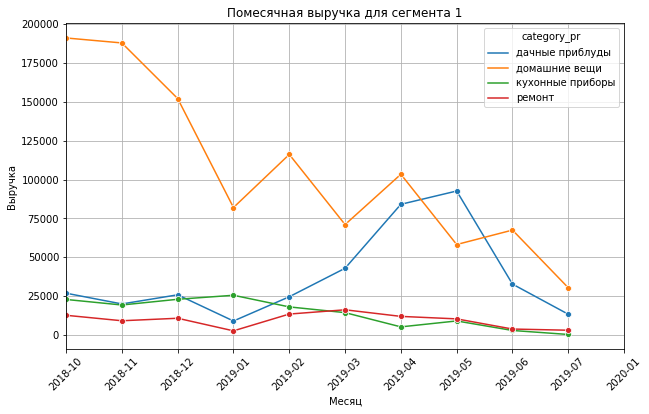

In [56]:
grouped_data_revenue = data.groupby(['sigments', 'date_y_m', 'category_pr'])['revenue'].sum().reset_index()
grouped_data_revenue['date_y_m'] = grouped_data_revenue['date_y_m'].astype(str)
segments = grouped_data_revenue['sigments'].unique()

segment_data_revenue_1 = grouped_data_revenue[grouped_data_revenue['sigments'] == segments[0]]
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='date_y_m', y='revenue', hue='category_pr', data=segment_data_revenue_1, marker='o')
ax.set_xlim(xmin='2018-10', xmax='2020-01')
plt.title(f'Помесячная выручка для сегмента {segments[0]}')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

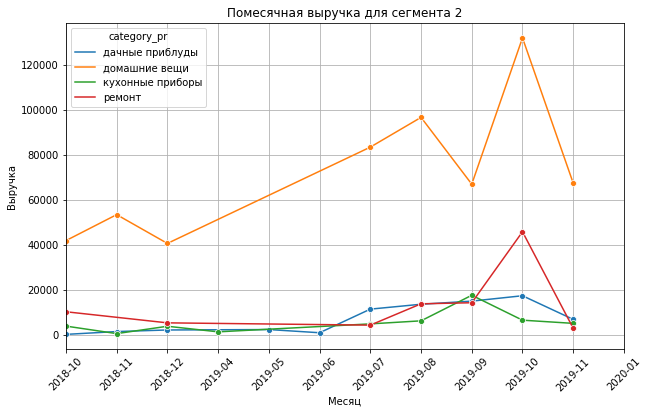

In [57]:
segment_data_revenue_2 = grouped_data_revenue[grouped_data_revenue['sigments'] == segments[1]]
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='date_y_m', y='revenue', hue='category_pr', data=segment_data_revenue_2, marker='o')
ax.set_xlim(xmin='2018-10', xmax='2020-01')
plt.title(f'Помесячная выручка для сегмента {segments[1]}')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

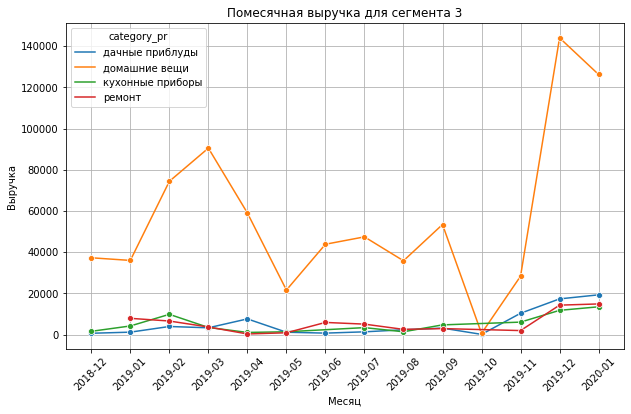

In [58]:
segment_data_revenue_3 = grouped_data_revenue[grouped_data_revenue['sigments'] == segments[2]]
plt.figure(figsize=(10, 6))
sns.lineplot(x='date_y_m', y='revenue', hue='category_pr', data=segment_data_revenue_3, marker='o')
plt.title(f'Помесячная выручка для сегмента {segments[2]}')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

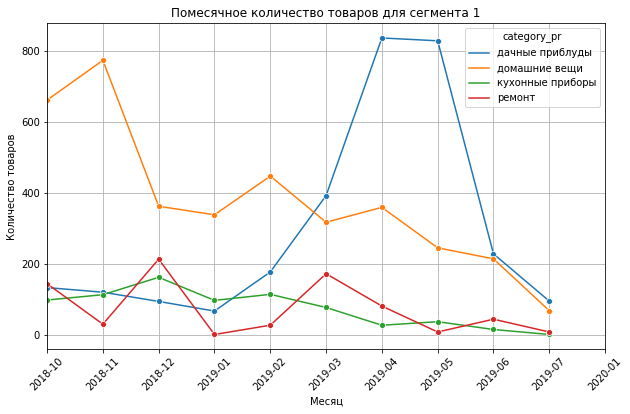

In [59]:
grouped_data_quantity = data.groupby(['sigments', 'date_y_m', 'category_pr'])['quantity'].sum().reset_index()
grouped_data_quantity['date_y_m'] = grouped_data_quantity['date_y_m'].astype(str)
segments = grouped_data_quantity['sigments'].unique()

segment_data_quantity_1 = grouped_data_quantity[grouped_data_quantity['sigments'] == segments[0]]
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='date_y_m', y='quantity', hue='category_pr', data=segment_data_quantity_1, marker='o')
ax.set_xlim(xmin='2018-10', xmax='2020-01')
plt.title(f'Помесячное количество товаров для сегмента {segments[0]}')
plt.xlabel('Месяц')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


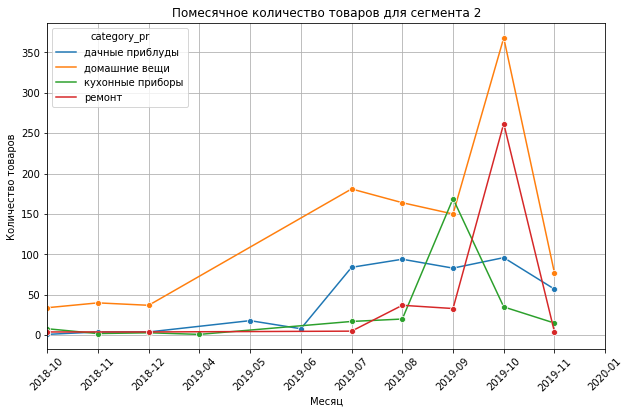

In [60]:
segment_data_quantity_2 = grouped_data_quantity[grouped_data_quantity['sigments'] == segments[1]]
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='date_y_m', y='quantity', hue='category_pr', data=segment_data_quantity_2, marker='o')
ax.set_xlim(xmin='2018-10', xmax='2020-01')
plt.title(f'Помесячное количество товаров для сегмента {segments[1]}')
plt.xlabel('Месяц')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

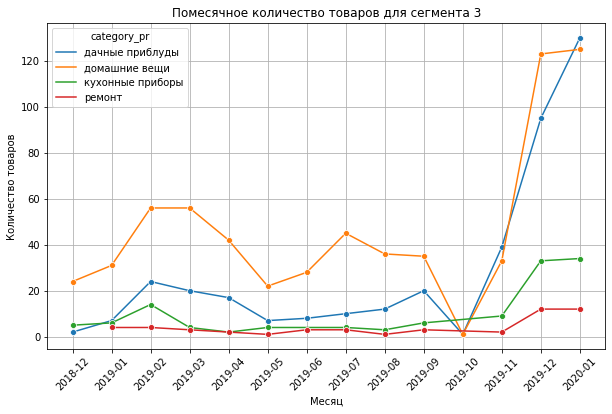

In [61]:
segment_data_quantity_3 = grouped_data_quantity[grouped_data_quantity['sigments'] == segments[2]]
plt.figure(figsize=(10, 6))
sns.lineplot(x='date_y_m', y='quantity', hue='category_pr', data=segment_data_quantity_3, marker='o')
plt.title(f'Помесячное количество товаров для сегмента {segments[2]}')
plt.xlabel('Месяц')
plt.ylabel('Количество товаров')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Вывод:
    - динамика выручки, среднего чека и средней выручки на человека катяться вниз и слегка поднимаются только в сезонны
    - сегменты 1 имеют самый низкий средний чек, хотя и больше всего количество покупателей больше всего интересуются дачным хозяйством, по графикам выручки и количеству товаров в этом сегменте, клиенты данного сегмента переодически закупались из категории домашние вещи и спрос на них спал, и на товары из дачной категории спрос приходит только в апреле и мае
    - сегмент 2 имееют меньше покупатлей , но имеют более большой средний чек чем у первых, востребовательна у них категория товаров для дома, из графиков видно, что у данного сегмента положительный спрос на товары для дома 
    - сегмент 3 имеет почти такие же характирестики как и второй , за исключением более непостоянной средней выручки чем у второй категории и повышения спроса на дачные приблуды.

## Проверка гипотез

Проверка первой гипотезы:

- Н0 - показатели средней выручки выбраных сегментов покупателей равны
- Н1 - показатели средней выручки выбраных сегментов покупателей не равны

Для проверки гипотез будем использовать t-тест, так как данный вид используется для сравнения средних значений. Он показывает наличие истинного эффекта и различий между группами. Так же применим поправки на множественную проверку гипотез (в нашем случае их 3) используя метод Холма для корректирования уровня значимости.

In [62]:
segment_1 = data[data['sigments'] == '1']['revenue']
segment_2 = data[data['sigments'] == '2']['revenue']
segment_3 = data[data['sigments'] == '3']['revenue']

def perform_t_test(group1, group2, name1, name2):
    mean1 = group1.mean()
    mean2 = group2.mean()
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    return name1, name2, mean1, mean2, t_statistic, p_value

# Проведение t-тестов и сбор результатов
results = []
results.append(perform_t_test(segment_1, segment_2, '1', '2'))
results.append(perform_t_test(segment_1, segment_3, '1', '3'))
results.append(perform_t_test(segment_2, segment_3, '2', '3'))

# Поправка Холма
alpha = 0.05
num_tests = len(results)
p_values = [result[5] for result in results]
sorted_indices = sorted(range(num_tests), key=lambda i: p_values[i])
corrected_p_values = [None] * num_tests
critical_value = alpha / (num_tests)

for i in sorted_indices:
    corrected_p_values[i] = p_values[i] * (num_tests - i)
    critical_value = min(critical_value, corrected_p_values[i])
    
# Вывод результатов с поправкой Холма
for i, (name1, name2, mean1, mean2, t_statistic, p_value) in enumerate(results):
    print(f"Сравнение сегментов {name1} и {name2}:")
    print(f" Средняя выручка {name1}: {mean1:.2f}")
    print(f" Средняя выручка {name2}: {mean2:.2f}")
    print(f" t-статистика: {t_statistic:.2f}")
    print(f" p-значение : {p_value:.3f}")
    print(f" p-значение (Холм): {corrected_p_values[i]:.3f}")
    if corrected_p_values[i] < alpha:
        print(" Отвергаем нулевую гипотезу: средние выручки различаются")
    else:
        print(" Не отвергаем нулевую гипотезу: средние выручки не различаются")
    print("-" * 20)

Сравнение сегментов 1 и 2:
 Средняя выручка 1: 509.20
 Средняя выручка 2: 858.84
 t-статистика: -9.44
 p-значение : 0.000
 p-значение (Холм): 0.000
 Отвергаем нулевую гипотезу: средние выручки различаются
--------------------
Сравнение сегментов 1 и 3:
 Средняя выручка 1: 509.20
 Средняя выручка 3: 858.01
 t-статистика: -10.08
 p-значение : 0.000
 p-значение (Холм): 0.000
 Отвергаем нулевую гипотезу: средние выручки различаются
--------------------
Сравнение сегментов 2 и 3:
 Средняя выручка 2: 858.84
 Средняя выручка 3: 858.01
 t-статистика: 0.02
 p-значение : 0.988
 p-значение (Холм): 0.988
 Не отвергаем нулевую гипотезу: средние выручки не различаются
--------------------


Проверка второй гипотезы:

- Н0 - показатели среднего чека выбраных сегментов покупателей равны
- Н1 - показатели среднего чека выбраных сегментов покупателей не равны

In [63]:
revenue_by_segment = data.groupby('sigments')['revenue'].sum()
num_orders_by_segment = data.groupby('sigments')['order_id'].nunique()
avg_check_by_segment = revenue_by_segment / num_orders_by_segment

# преобразование средних чеков в список для удобства
segments = avg_check_by_segment.index.tolist()
avg_checks = avg_check_by_segment.values

# попарные t-тесты и поправка Холма
p_values = []
for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        t_statistic, p_value = stats.ttest_ind_from_stats(
            mean1=avg_checks[i],
            std1=data[data['sigments'] == segments[i]]['revenue'].std(),
            nobs1=num_orders_by_segment[segments[i]], 
            mean2=avg_checks[j],
            std2=data[data['sigments'] == segments[j]]['revenue'].std(), 
            nobs2=num_orders_by_segment[segments[j]] 
        )
        p_values.append(p_value)

num_tests = len(p_values)
sorted_indices = sorted(range(num_tests), key=lambda i: p_values[i])
corrected_p_values = [None] * num_tests
alpha = 0.05
critical_value = alpha / num_tests

for i in sorted_indices:
    corrected_p_values[i] = p_values[i] * (num_tests - i)
    critical_value = min(critical_value, corrected_p_values[i])

k = 0
for i in range(len(segments)):
    for j in range(i + 1, len(segments)):
        print(f"Сравнение сегментов {segments[i]} и {segments[j]}:")
        print(f" Средний чек {segments[i]}: {avg_checks[i]:.2f}")
        print(f" Средний чек {segments[j]}: {avg_checks[j]:.2f}")
        print(f" p-значение : {p_values[k]:.3f}")
        print(f" p-значение (Холм): {corrected_p_values[k]:.3f}")
        if corrected_p_values[k] < alpha:
            print("   Отвергаем нулевую гипотезу: средние чеки различаются.")
        else:
            print("   Не отвергаем нулевую гипотезу: средние чеки не различаются.")
        k += 1
        print("-" * 20)

Сравнение сегментов 1 и 2:
 Средний чек 1: 1129.67
 Средний чек 2: 987.46
 p-значение : 0.002
 p-значение (Холм): 0.005
   Отвергаем нулевую гипотезу: средние чеки различаются.
--------------------
Сравнение сегментов 1 и 3:
 Средний чек 1: 1129.67
 Средний чек 3: 858.01
 p-значение : 0.000
 p-значение (Холм): 0.000
   Отвергаем нулевую гипотезу: средние чеки различаются.
--------------------
Сравнение сегментов 2 и 3:
 Средний чек 2: 987.46
 Средний чек 3: 858.01
 p-значение : 0.023
 p-значение (Холм): 0.023
   Отвергаем нулевую гипотезу: средние чеки различаются.
--------------------


# Вывод:
  Из полученных результатов тестов делаем вывод, что:
  - сегмент 1 не сходится не по средней выручки , не по показателю среднего чека с остальными сегментами
  - сегмент 2 и 3 сходятся по обоим тестам 

# Общий вывод:

Подитожив, в проекте были проделаны такие работы как:

    -    предобработка данных в которой преобразовали данные в значении даты заказа, убраны аномальные значения в в количественных показателях, были убраны неявные дубликаты номеров заказа не соответствующих по уникальности даты.
    - исследовательский анализ данных, в котором категоризировали данные заказов по категории товара, построили гистограммы и составили топы по интересующим нас метрикам на каждую категорию товара, добавили несколько новых категорий в данные(выручка, даты сокращенные до год-месяц, дни недели и отдельно годы) и самое главное произведена сегментация покупателей по категориям и выявлены из них 3 основных категорий
    - ответили на основные вопросы исследования 
    - произведена попарная проверка гипотез по всем возможным сочетанияям сегмента

Из проделанной работы можно сделать вывод, что основные покупатели магазина - клиенты которые приходят разово, сезонно.
У магазина очень маленький показатель постоянных покупателей (которые имеют хороший средний чек) и хорошую выручку. Основную  кассу конечно делают товары для дома, и со временем у ушедших посетителей из сегмента 1 уменьшался спрос на эти товары. В качестве рекомендации для рекламных рассылок предлагаю:

        - для сегмента 1 :
            В январе направлять предложения из категории домашних вещей и кухонныхприборов
            В феврале направлять предложения из категории домашних вещей, дачных приблуд и ремонта
            В марте направлять предложения из категории дачных приблуд и ремонта
            В апреле направлять предложения из категории дачных приблуд
            В мае направлять предложения из категории дачных приблуд
            В июне направлять предложения из категории ремонта
            В июле направлять предложения из категории кухонные принадлежности
            
        - для сегмента 2 :
            В декабре направлять предложения из категории домашних вещей
            В апреле направлять предложения из категории дачных приблуд и домашних вещей
            В мае направлять предложения из категории дачных приблуд и домашних вещей
            В июне направлять предложения из категории домашних вещей и кухонных приборов
            В июле направлять предложения из категории кухонные принадлежности
            В августе направлять предложения из категории дачных приблуд и ремонта
            В сентябре направлять предложения из категории кухонных приборов
            В октябре направлять предложения из категории домашних вещей, дачных приблуд и ремонта
            
        - для сегмента 3 :
            В январе направлять предложения из категории дачных приблуд и домашних вещей
            В феврале направлять предложения из категории дачных приблуд, домашних вещей и кухонных приборов
            В марте направлять предложения из категории домашних вещей
            В апреле направлять предложения из категории дачных приблуд и домашних вещей
            В мае направлять предложения из категории кухонные принадлежности
            В июне направлять предложения из категории домашних вещей, дачных приблуд и ремонта
            В июле направлять предложения из категории домашних вещей и дачных приблуд
            В августе направлять предложения из категории домашних вещей и дачных приблуд 
            В сентябре направлять предложения из категории домашних вещей, кухонных приборов и дачных приблуд 
            В ноябре направлять предложения из категории домашних вещей и дачных приблуд
            в декабре направлять предложения по всем категориям